In [1]:
from datetime import datetime
from utils import get_pg_engine
import pandas as pd
import numpy as np

In [2]:
engine = get_pg_engine()

In [3]:
corrs = pd.read_sql('select * from correlations_2019_01_01_2020_01_19_1000', engine)

In [4]:
corrs.shape

(435711, 5)

In [6]:
corrs[corrs['cor'] > 0.95].head(20)

,index,symbol1,symbol2,cor,id
184,101816,AAIF,BIOG,0.996575,2019_01_01_2020_01_19_1000
186,101818,AAS,BIOG,0.996441,2019_01_01_2020_01_19_1000
190,101822,ADIG,BIOG,0.994532,2019_01_01_2020_01_19_1000
192,101824,AEFS,BIOG,0.963909,2019_01_01_2020_01_19_1000
193,101825,AEMC,BIOG,0.996316,2019_01_01_2020_01_19_1000
194,101826,AEWL,BIOG,0.988132,2019_01_01_2020_01_19_1000
195,101827,AEWU,BIOG,0.996533,2019_01_01_2020_01_19_1000
206,101838,AIE,BIOG,0.993276,2019_01_01_2020_01_19_1000
207,101839,AIF,BIOG,0.959165,2019_01_01_2020_01_19_1000
213,101845,AJOT,BIOG,0.997704,2019_01_01_2020_01_19_1000


In [35]:
price = pd.read_sql('select * from price \
    where \
     ("timestamp" between \'2019-01-01-\' and \'2020-01-19\')', engine)

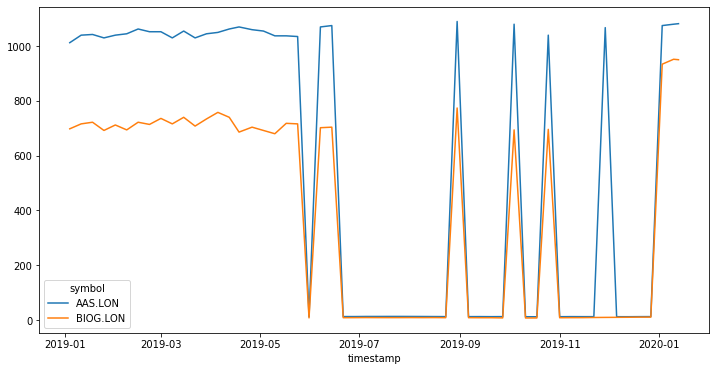

In [36]:
price[price['symbol'].isin(['AAS.LON','BIOG.LON'])][['timestamp','close','symbol']].pivot(index = 'timestamp', values = 'close', columns='symbol')\
.plot(figsize=(12,6))

In [54]:
stdevs = price.groupby('symbol')['close'].apply(lambda x: np.std(x)/x.mean())

In [60]:
stdevs[stdevs>0].sort_values(ascending=False).head(25)

symbol
HMJP.LON    4.625850
FEUZ.LON    4.615874
MXEU.LON    4.477829
MVEX.LON    4.471946
IEER.LON    4.464599
IAPD.LON    4.330008
CU31.LON    4.277057
AERI.LON    4.271890
FLXD.LON    3.206049
FLES.LON    3.202004
CSP1.LON    2.875713
HMUS.LON    2.814608
FJP.LON     2.737748
AASG.LON    2.733610
CGI.LON     2.336697
IQSA.LON    2.278346
CEUG.LON    2.247709
FLOS.LON    2.237883
WINV.LON    2.211286
SONC.LON    2.207507
ES15.LON    2.139123
GRIT.LON    2.124569
ITKY.LON    2.082472
CBUG.LON    2.043164
BCPT.LON    2.005875
Name: close, dtype: float64

In [62]:
price[price['symbol'] == 'AAS.LON']['close']

894    1081.9200
895    1080.0000
896    1075.0000
897      12.2048
898      12.1585
899      12.0711
900      11.7820
901      11.8348
902    1067.5000
903      12.0283
904      11.9994
905      12.1412
906      11.8299
907    1040.0000
908      11.6139
909      11.6984
910    1080.0000
911      12.1631
912      11.9889
913      12.1945
914      12.1025
915    1090.0000
916      12.1865
917      12.3361
918      12.5308
919      12.6805
920      12.7942
921      12.7809
922      12.6919
923      12.6826
924      12.3206
925      12.3114
926    1075.0000
927    1070.0000
928      12.0163
929    1035.0000
930    1037.5000
931    1037.5000
932    1055.0000
933    1060.0000
934    1070.0000
935    1062.5000
936    1050.0000
937    1045.0000
938    1030.0000
939    1055.0000
940    1030.0000
941    1052.5000
942    1052.5000
943    1062.5000
944    1045.0000
945    1040.0000
946    1030.0000
947    1042.5000
948    1040.0000
949    1012.5000
Name: close, dtype: float64